In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
n=10
x=np.linspace(0,30,n)
y=np.linspace(0,30,n)
t=np.linspace(0,60,n)
dx=x[1]-x[0]
dy=y[1]-y[0]
c=1.0
dt=0.5*dx/c
a=c*dt/dx
b=c*dt/dy

In [65]:
#creates a matrix of zeros
initial=np.zeros((n,n))
#sets the perturbation in the given point
initial[n/3][n/2-1]=-0.5
#creates the mask as a ones matrix
mask=np.ones((n,n))
#sets the conditions
#left-hand side wall
mask[:,0]=0
#right-hand side wall
mask[:,n-1]=0
#upper wall
mask[0,:]=0
#lower wall
mask[n-1,:n-1]=0
#slit
mask[-n/3][:]=0
#mask[-n/3][-n/2:n/2]=1
#makes the product
fotogramas=[]
fotogramas.append(initial)
print mask

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


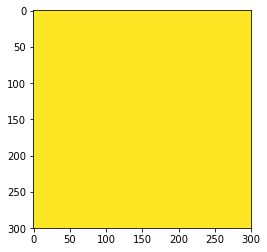

In [39]:
plt.imshow(initial)
plt.show()
#implementation of the solution is based on the notebook available in github
#value of the slit can be considered as a fixed condition

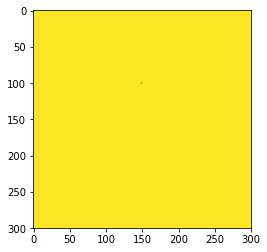

In [45]:
#calculates for t=1 using numpy roll
#future_1=np.zeros((n+1,n+1))
next_x=np.roll(initial,+1,axis=0)
next_y=np.roll(initial,+1,axis=1)
down_x=np.roll(initial,-1,axis=0)
down_y=np.roll(initial,-1,axis=1)
future=(a**2/2)*(next_x+down_x)+(b**2/2)*(next_y+down_y)+initial*(1-b**2-a**2)
past=np.copy(initial)
present=np.copy(future)
#multiplies by the mask

fotogramas.append(present)
plt.imshow(present)
plt.show()

In [43]:
#knowing t=0 and t=1 we can continue the temporal loop
#calculate the number of temporal iterations
#m=60.0/dt

for t in range(1196):
    downx=np.roll(present,-1,axis=0)
    upx=np.roll(present,+1,axis=0)  
    downy=np.roll(present,-1,axis=1)
    upy=np.roll(present,+1,axis=1)
    future=(a**2/2)*(upx+downx)+(b**2/2)*(upy+downy)+present*(1-b**2-a**2)-past
    past=np.copy(present)
    present=np.copy(future)
    fotogramas.append(present)
    
    if t==598:
        plt.figure(1)
        plt.subplot(2,1,1)
        plt.imshow(present)
        plt.tight_layout()
    if t==1196:
        plt.subplot(2,1,2)
        plt.imshow(present)
        plt.tight_layout()
        plt.savefig('Resultados_hw3.pdf')

/Users/gustavoardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in add


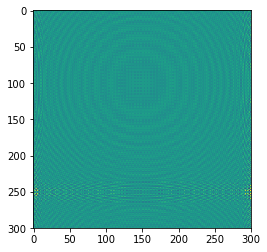

In [11]:
plt.imshow(present)
plt.show()

In [ ]:
#boundary conditions implemented with mask
#set the mask as zero where we want our WF to be zero
#create the slit as a mask of zeros except where it is opened
#set the boundaries as zero too
#later on multiply using numpy methods
